In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-mask-dataset/data/with_mask/with_mask_1996.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_2201.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_1215.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_2905.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_3459.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_623.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_2234.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_1567.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_1761.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_1413.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_2394.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_1579.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_335.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_2663.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_2671.jpg
/kaggle/inpu

/kaggle/input/face-mask-dataset/data/with_mask/with_mask_1992.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_2183.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_2940.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_238.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_545.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_3340.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_3540.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_1328.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_1995.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_927.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_2106.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_260.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_3265.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_3529.jpg
/kaggle/input/face-mask-dataset/data/with_mask/with_mask_1593.jpg
/kaggle/input/

/kaggle/input/face-mask-dataset/data/without_mask/without_mask_508.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3078.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_172.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1904.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2921.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_264.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3802.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1706.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_613.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1184.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1917.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_348.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2363.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1866.j

/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2980.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3209.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_724.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_819.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_677.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_875.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1935.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3450.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_603.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2027.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1994.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_454.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2817.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_799.jpg

In [24]:

from fastai.imports import *

In [25]:
path = Path("/kaggle/input/face-mask-dataset/data")
path.ls()

(#2) [Path('/kaggle/input/face-mask-dataset/data/with_mask'),Path('/kaggle/input/face-mask-dataset/data/without_mask')]

In [26]:
from fastai.vision.all import *

In [27]:
data = ImageDataLoaders.from_folder(path, train='.', valid_pct=0.2, size=224, item_tfms=Resize(224),num_workers=4)

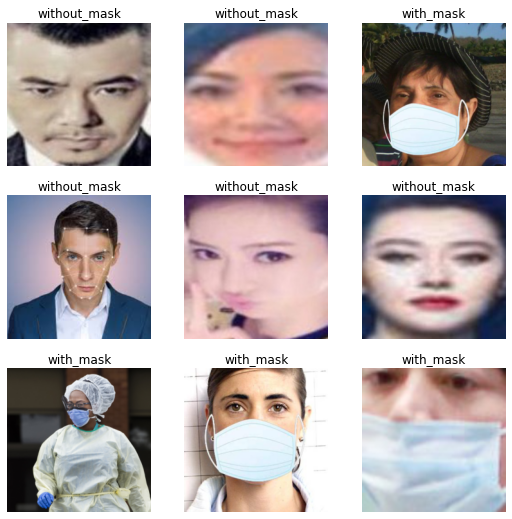

In [28]:
data.show_batch()

In [29]:
learn = cnn_learner(data, resnet50, metrics=error_rate)

In [30]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.116360,0.052077,0.014570,00:43


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.053603,0.017121,0.005298,00:47
1,0.022956,0.008517,0.001987,00:47


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [31]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(4,slice(lr1,lr2))


epoch,train_loss,valid_loss,error_rate,time
0,0.937611,0.717564,0.081457,00:48
1,0.264737,0.067674,0.019205,00:47
2,0.087926,0.034192,0.012583,00:47
3,0.041263,0.074980,0.011921,00:46


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency e

In [32]:
# lr1 = 1e-3
lr = 1e-1
learn.fit_one_cycle(20,slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,0.047678,0.579329,0.044371,00:49
1,0.116458,0.212350,0.070861,00:48
2,0.525676,17.196955,0.313245,00:47
3,0.481936,0.463120,0.142384,00:48
4,0.424231,0.603670,0.296689,00:47
5,0.387981,0.195993,0.068212,00:47
6,0.290859,0.240980,0.059603,00:47
7,0.234558,0.273719,0.098675,00:47
8,0.438499,0.660717,0.170861,00:46
9,0.284746,0.239762,0.102649,00:47


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency e

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [33]:
learn.unfreeze()
# learn.lr_find()
# learn.recorder.plot()
learn.fit_one_cycle(10,slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.042359,0.069041,0.019868,00:44
1,0.035606,0.070595,0.019205,00:44
2,0.035120,0.071764,0.019205,00:45
3,0.038518,0.071020,0.019868,00:44
4,0.036136,0.067622,0.018543,00:44
5,0.039738,0.069271,0.019868,00:43
6,0.038380,0.069147,0.019205,00:44
7,0.035413,0.070953,0.019205,00:44
8,0.034825,0.071288,0.019868,00:43
9,0.036134,0.070728,0.019205,00:44


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency e

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


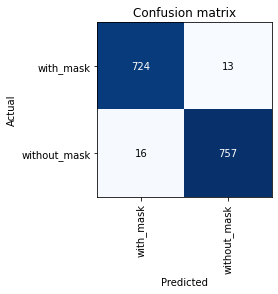

In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [35]:
learn.predict('../input/face-mask-dataset/data/without_mask/without_mask_1.jpg')

('without_mask', tensor(1), tensor([0.0058, 0.9942]))

correct prediction! 